In [1]:
import sys

In [2]:
print("Following are your python version details:\n%s" % sys.version)

Following are your python version details:
2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_context("poster")
sns.set_style("ticks")

In [5]:
print "Numpy version: ", np.__version__
print "Pandas version: ", pd.__version__
print "Matplotlib version: ", plt.matplotlib.__version__
print "Seaborn version: ", sns.__version__

Numpy version:  1.11.2
Pandas version:  0.19.0
Matplotlib version:  1.5.3
Seaborn version:  0.7.1


In [6]:
x = np.arange(-10,10,0.14)
y = x**2
print "x.shape: ", x.shape
print "y.shape: ", y.shape

x.shape:  (143,)
y.shape:  (143,)


## Matplotlib checks

More details at: http://matplotlib.org/users/pyplot_tutorial.html

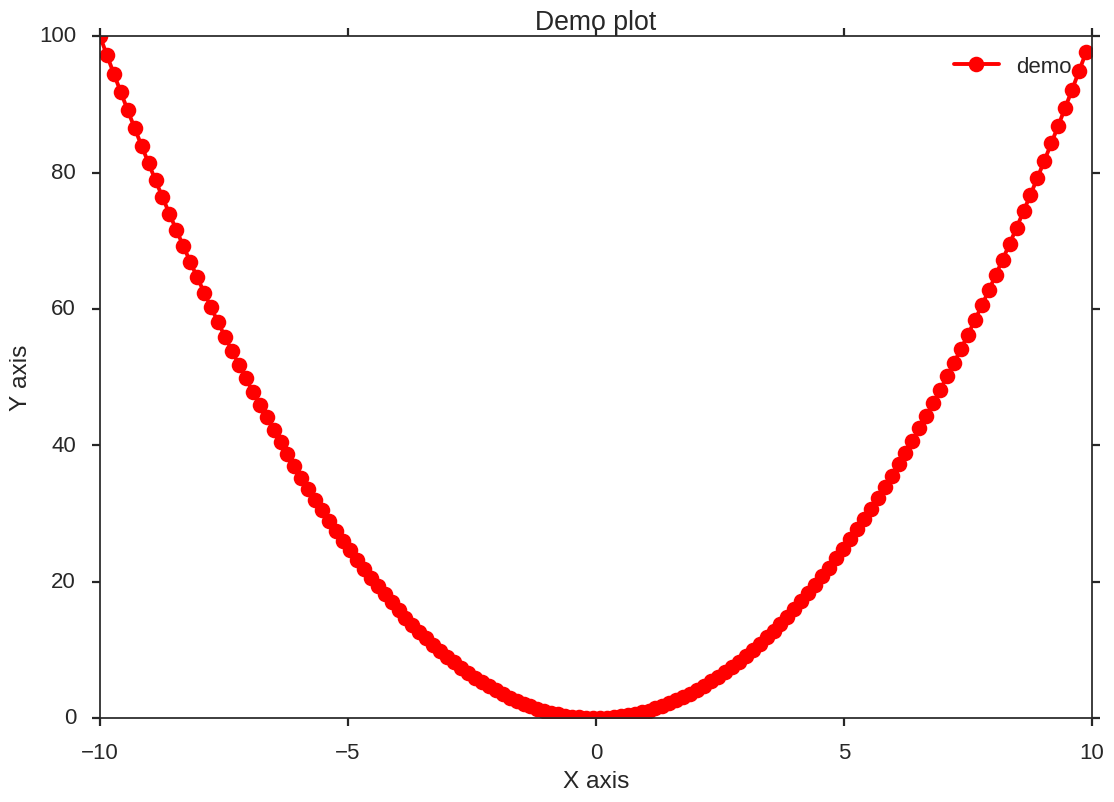

In [7]:
plt.plot(x,y, marker="o", color="r", label="demo")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Demo plot")
plt.legend()

## Pandas checks

More details at: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

In [8]:
df = pd.DataFrame()
df["X"] = x
df["Y"] = y
df["G"] = np.random.randint(1,10,size=x.shape)
df["E"] = np.random.randint(1,5,size=x.shape)
df.shape

(143, 4)

In [9]:
df.head()

,X,Y,G,E
0,-10.00,100.0000,2,3
1,-9.86,97.2196,8,4
2,-9.72,94.4784,1,4
3,-9.58,91.7764,3,1
4,-9.44,89.1136,4,4


In [10]:
df.describe()

,X,Y,G,E
count,143.000000,143.000000,143.00000,143.000000
mean,-0.060000,33.402000,4.86014,2.461538
std,5.799448,29.983316,2.48262,1.124436
min,-10.000000,0.003600,1.00000,1.000000
25%,-5.030000,6.354000,3.00000,1.000000
50%,-0.060000,24.800400,5.00000,3.000000
75%,4.910000,56.100200,7.00000,3.000000
max,9.880000,100.000000,9.00000,4.000000


In [11]:
df.G = df.G.astype("category")
df.E = df.E.astype("category")

## Seaborn checks

More details at: https://stanford.edu/~mwaskom/software/seaborn/index.html

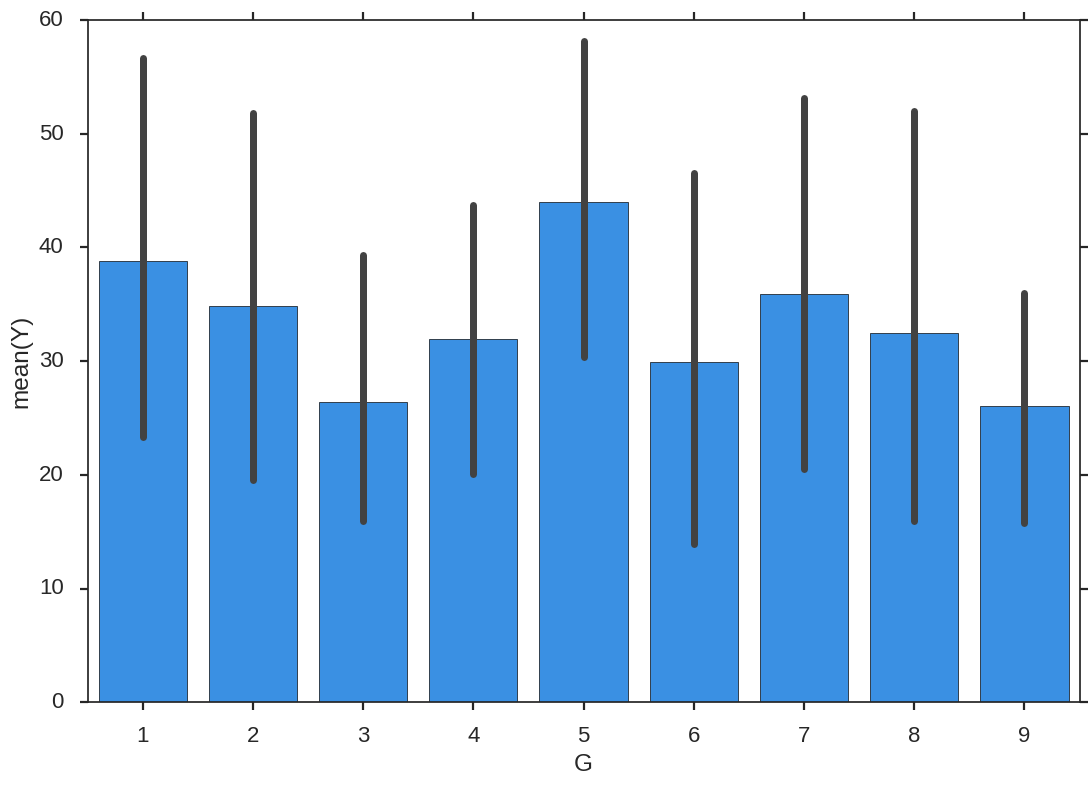

In [12]:
sns.barplot(x="G", y="Y", data=df, estimator=np.mean, color="dodgerblue")

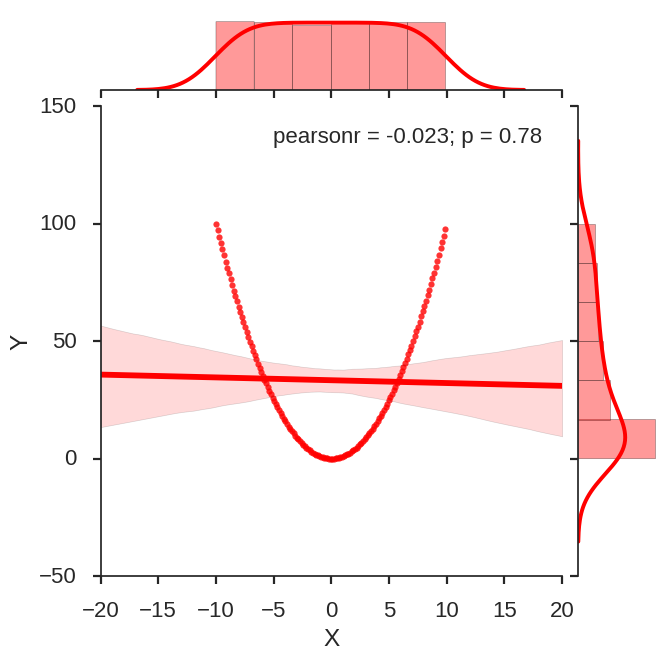

In [13]:
g = sns.jointplot("X", "Y", data=df, kind="reg",
                  color="r", size=7)

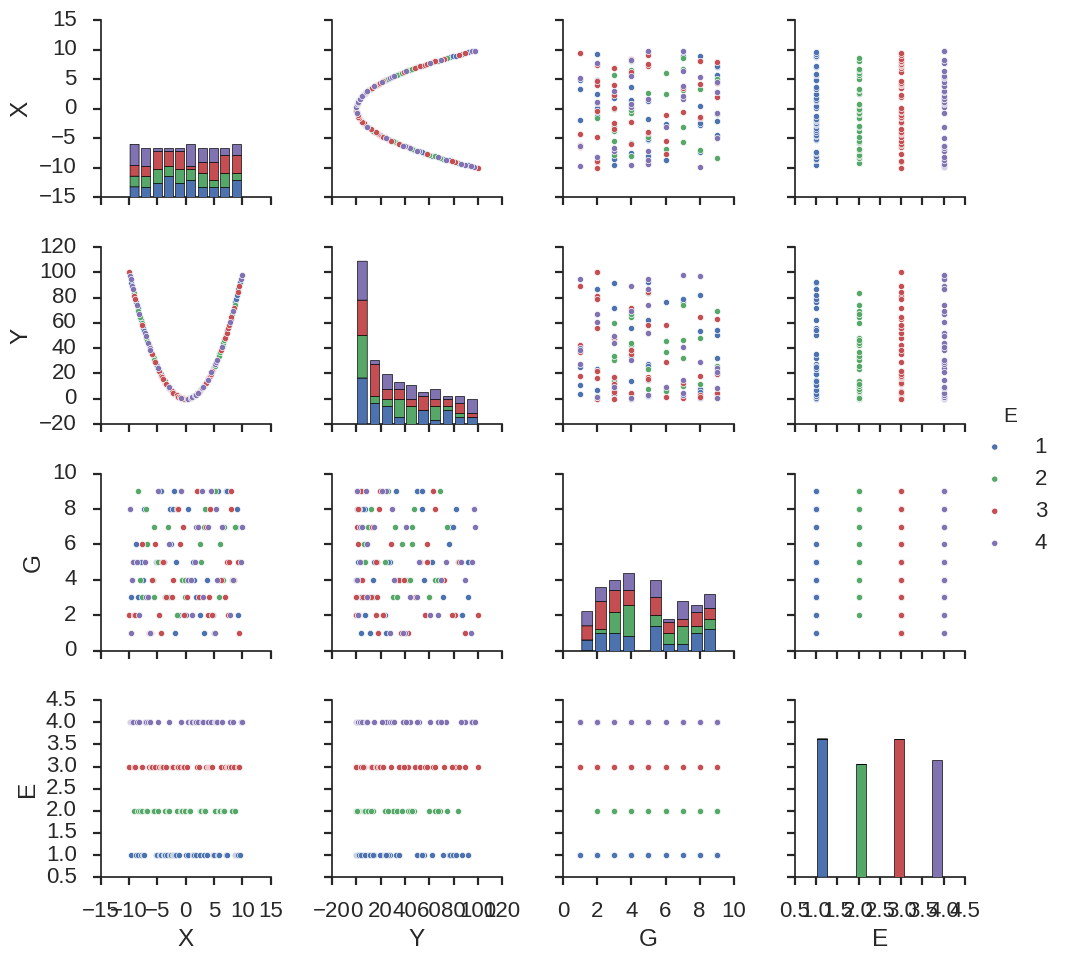

In [14]:
sns.pairplot(df, hue="E")

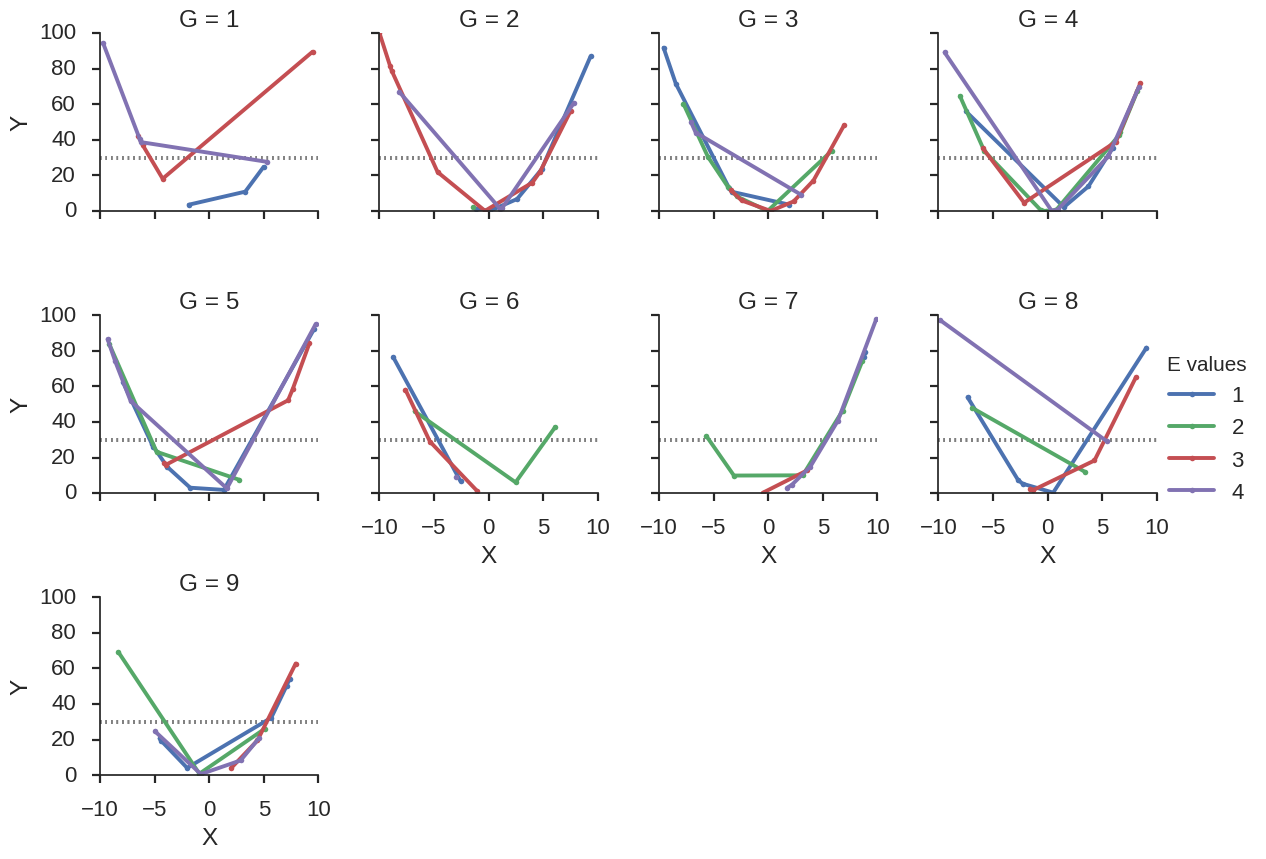

In [15]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="G", hue="E", col_wrap=4, size=3, legend_out=True)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=30, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
t = grid.map(plt.plot, "X", "Y", marker="o", ms=4).add_legend(title="E values")
#grid.fig.tight_layout(w_pad=1)

## Sklearn checks
More details at: http://scikit-learn.org/stable/index.html

In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report

## Linear regreession

In [17]:
X = df[["X"]].copy()
y = df["Y"].copy()
print "X.shape: ", X.shape
print "Y.shape: ", y.shape

X.shape:  (143, 1)
Y.shape:  (143,)


In [18]:
model_linear = LinearRegression()
model_linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_pred = model_linear.predict(X)
print "Y_pred.shape: ", y_pred.shape

Y_pred.shape:  (143,)


In [20]:
X["X^2"] = X["X"]**2

In [21]:
X.columns

Index([u'X', u'X^2'], dtype='object')

In [22]:
model_sqr = LinearRegression()
model_sqr.fit(X, y)
y_pred_sqr = model_sqr.predict(X)
print "Y_pred_sqr.shape: ", y_pred_sqr.shape

Y_pred_sqr.shape:  (143,)


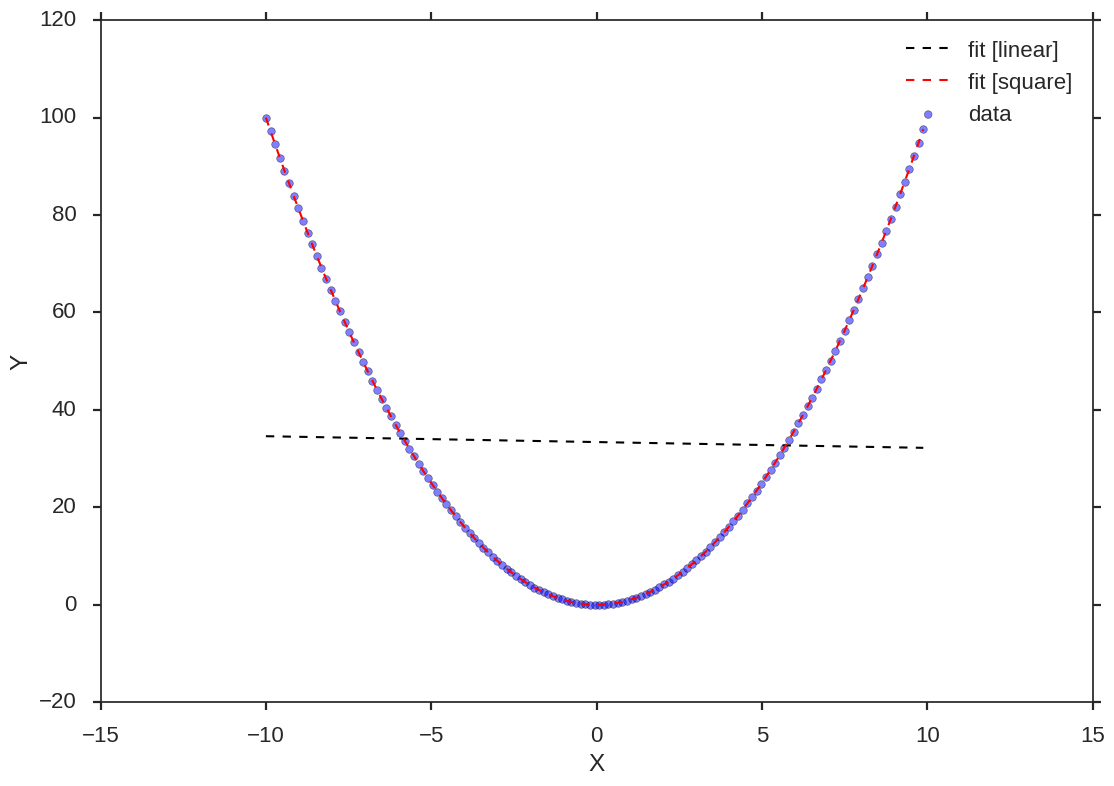

In [23]:
plt.scatter(X["X"], y, marker="o", label="data", alpha=0.5, s=30)
plt.plot(X["X"], y_pred, linestyle="--", linewidth=1.5, color="k", label="fit [linear]")
plt.plot(X["X"], y_pred_sqr, linestyle="--", linewidth=1.5, color="r", label="fit [square]")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [24]:
model_linear.coef_

array([-0.12])

In [25]:
model_sqr.coef_

array([ -2.15084697e-16,   1.00000000e+00])

## Statsmodels
More details at: http://statsmodels.sourceforge.net/

In [26]:
import statsmodels.api as sm

In [27]:
model = sm.OLS(y, X)
res = model.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     1.000     
Dependent Variable: Y                AIC:                -8799.3968
Date:               2016-10-13 10:30 BIC:                -8793.4711
No. Observations:   143              Log-Likelihood:     4401.7    
Df Model:           2                F-statistic:        1.317e+33 
Df Residuals:       141              Prob (F-statistic): 0.00      
R-squared:          1.000            Scale:              1.0902e-28
-------------------------------------------------------------------
        Coef.  Std.Err.           t            P>|t|  [0.025 0.975]
-------------------------------------------------------------------
X       0.0000   0.0000                 4.9590 0.0000 0.0000 0.0000
X^2     1.0000   0.0000 51312209119246088.0000 0.0000 1.0000 1.0000
-------------------------------------------------------------------
Omnibus:              36.293        Durbin-Watson:           0.070 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        59.835
Skew:                 -1.236        Prob(JB):                0.000 
Kurtosis:             4.983         Condition No.:           8     
===================================================================

"""

In [28]:
model = sm.OLS.from_formula("Y ~ X + I(X**2)", data=df)
res = model.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
======================================================================
Model:               OLS               Adj. R-squared:      1.000     
Dependent Variable:  Y                 AIC:                 -8608.1548
Date:                2016-10-13 10:30  BIC:                 -8599.2663
No. Observations:    143               Log-Likelihood:      4307.1    
Df Model:            2                 F-statistic:         1.548e+32 
Df Residuals:        140               Prob (F-statistic):  0.00      
R-squared:           1.000             Scale:               4.1242e-28
----------------------------------------------------------------------
          Coef.  Std.Err.           t            P>|t|   [0.025 0.975]
----------------------------------------------------------------------
Intercept 0.0000   0.0000                10.5471 0.0000  0.0000 0.0000
X         0.0000   0.0000                 0.0944 0.9249 -0.0000 0.0000
I(X ** 2) 1.0000   0.0000 17588912151770600.0000 0.0000  1.0000 1.0000
----------------------------------------------------------------------
Omnibus:               15.395         Durbin-Watson:            0.021 
Prob(Omnibus):         0.000          Jarque-Bera (JB):         15.506
Skew:                  0.751          Prob(JB):                 0.000 
Kurtosis:              2.409          Condition No.:            67    
======================================================================

"""

## Logistic regression

In [29]:
X = df[["X", "Y"]]
y = df["E"]

In [30]:
model = LogisticRegression(multi_class="multinomial", solver="lbfgs")
model.fit(X, y)
y_pred = model.predict(X)
print classification_report(y, y_pred)

             precision    recall  f1-score   support

          1       0.28      0.51      0.36        39
          2       0.00      0.00      0.00        32
          3       0.33      0.41      0.36        39
          4       0.35      0.24      0.29        33

avg / total       0.25      0.31      0.26       143



/content/smishra8/SOFTWARE/anaconda2/envs/datamining/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
y_pred_p = model.predict_proba(X)

In [32]:
y_pred_p[:10]

array([[ 0.2334859 ,  0.17761939,  0.22663634,  0.36225837],
       [ 0.23517236,  0.18026003,  0.22772812,  0.35683949],
       [ 0.23681743,  0.18287258,  0.22878689,  0.3515231 ],
       [ 0.23842152,  0.18545582,  0.22981351,  0.34630914],
       [ 0.23998509,  0.18800858,  0.23080891,  0.34119743],
       [ 0.2415086 ,  0.19052972,  0.23177398,  0.3361877 ],
       [ 0.24299258,  0.19301816,  0.23270967,  0.33127958],
       [ 0.24443758,  0.19547287,  0.23361692,  0.32647263],
       [ 0.24584416,  0.19789285,  0.23449668,  0.32176631],
       [ 0.24721293,  0.20027714,  0.23534991,  0.31716002]])

In [33]:
model = sm.MNLogit.from_formula("E ~ Y + X", data=df)
res = model.fit()
#res.summary2()

Optimization terminated successfully.
         Current function value: 1.373310
         Iterations 5


/content/smishra8/SOFTWARE/anaconda2/envs/datamining/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:580: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  start_params = np.zeros((self.K * (self.J-1)))
/content/smishra8/SOFTWARE/anaconda2/envs/datamining/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/content/smishra8/SOFTWARE/anaconda2/envs/datamining/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1756: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  params = params.reshape(self.K, -1, order='F')
/content/smishra8/SOFTWARE/anaconda2/envs/datamining/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:1697: VisibleD

In [34]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                        MNLogit   Df Residuals:                      134
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                0.006362
Time:                        10:30:18   Log-Likelihood:                -196.38
converged:                       True   LL-Null:                       -197.64
                                        LLR p-value:                    0.8668
==============================================================================
    y=E[2]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0905      0.348     -0.260      0.795        -0.772     0.591
Y             -0.0036      0.008     -0.436      0.663        -0.020     0.013
X             -0.0180      0.043     -0.415      0.678        -0.103     0.067
------------------------------------------------------------------------------
    y=E[3]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0530      0.338     -0.157      0.876        -0.716     0.610
Y              0.0015      0.008      0.197      0.844        -0.014     0.017
X              0.0127      0.040      0.321      0.748        -0.065     0.090
------------------------------------------------------------------------------
    y=E[4]       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4292      0.366     -1.172      0.241        -1.147     0.289
Y              0.0073      0.008      0.936      0.349        -0.008     0.023
X             -0.0137      0.040     -0.342      0.732        -0.092     0.065
==============================================================================
"""